In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

DATASET DESCRIPTION
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The columns of this dataset are

Model
Make
Engine Size(L)
Cylinders
Fuel Type
Fuel Consumption City (L/100 km)
Fuel Consumption Hwy (L/100 km)
Fuel Consumption Comb (mpg and L/100 km)
Vehicle class
Transmission

## Read Dataset

In [ ]:
df = pd.read_csv("co2.csv")


independent variables = feature = estimator = Engine Size(L)

dependent variables = target = label = CO2 Emissions(g/km)





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
df.tail(7)  # verinin son kısmını görelim

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
# check duplicates
df.duplicated().sum()

1103

In [ ]:
#drop duplicates
df = df.drop_duplicates()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [ ]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


<Axes: >

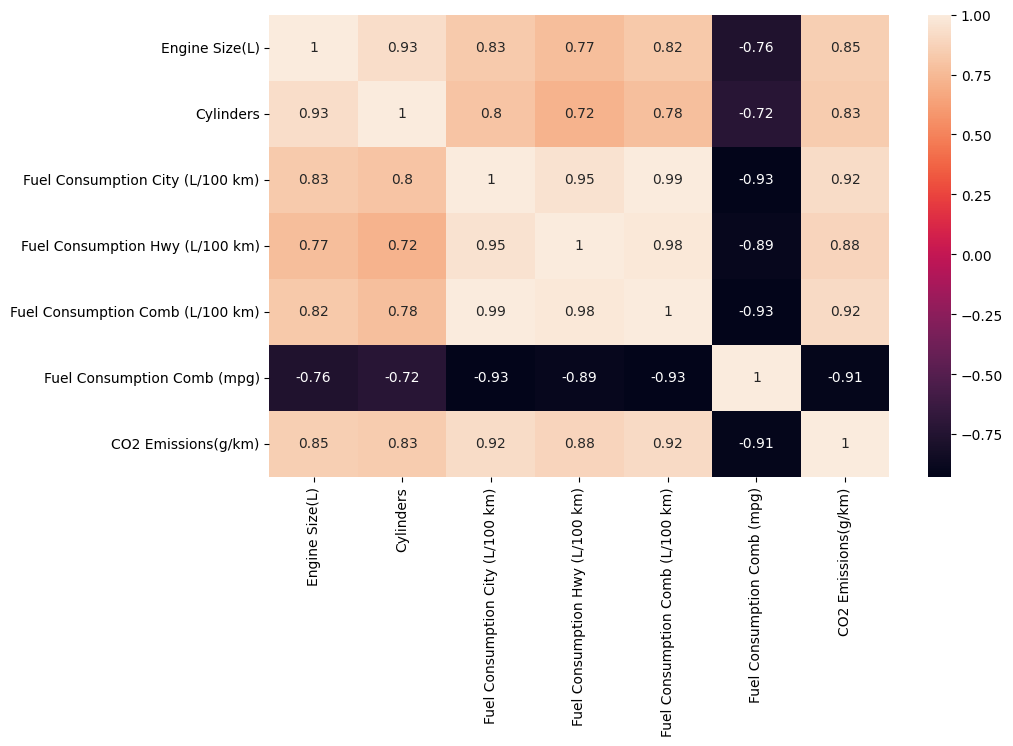

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
import scipy.stats as stats

In [ ]:
df_new = df[["Engine Size(L)", "CO2 Emissions(g/km)"]]
df_new.columns = ['Engine_Size', 'CO2_Emissions']
df_new.head()

,Engine_Size,CO2_Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


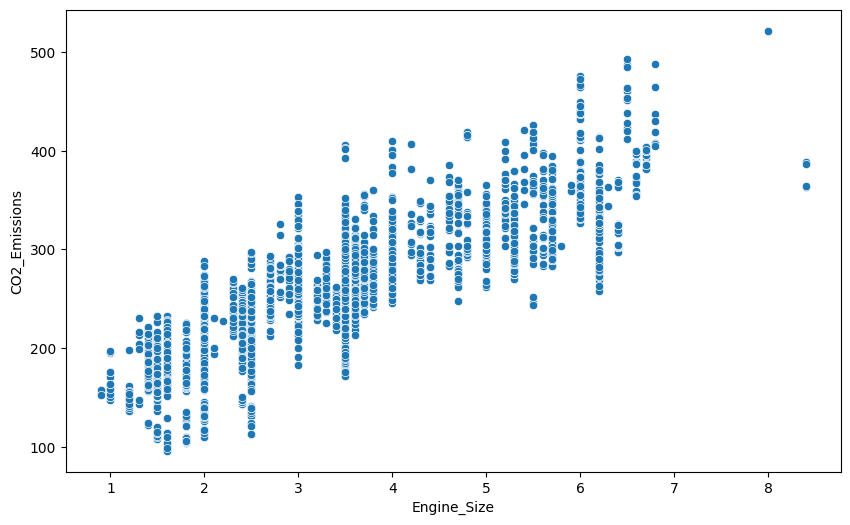

In [ ]:
sns.scatterplot(x="Engine_Size", y="CO2_Emissions", data=df_new);

# Correlation between independent variable and dependent variable

In [ ]:
corr = df_new.CO2_Emissions.corr(df_new.Engine_Size)
corr

0.85480156550535

## Coefficant of determination (R2)

In [ ]:
R2_score =corr**2
R2_score

0.7306857163903973

## Linear Regression

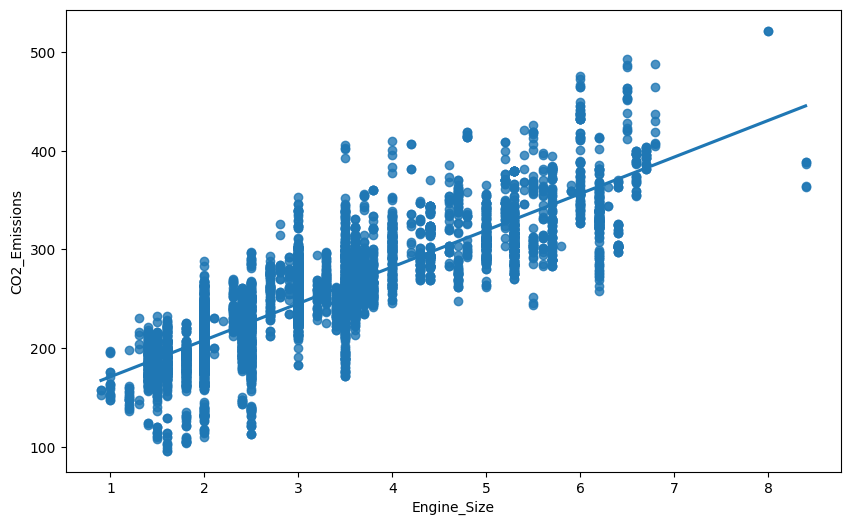

In [ ]:
# Least square Error (LSE) best fit

sns.regplot(x="Engine_Size", y="CO2_Emissions", data=df_new, ci=None);

Spliting the dataset into X (independent variables) and y (dependent variables)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df_new.drop(columns="CO2_Emissions")
y=df_new.CO2_Emissions

In [ ]:
X.head()

,Engine_Size
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.2, random_state=42)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5025, 1)
y Train features shape: (5025,)
X Test features shape : (1257, 1)
Y Test features shape : (1257,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
model.coef_

array([37.09665635])

In [ ]:
model.intercept_

133.7210010603598

In [ ]:
y_pred_train=model.predict(X_train)


In [ ]:
eval_metric (y_train, y_pred_train)

Model testing performance: 
---------------------------
R2_score 	: 0.7303755587668523
MAE 		: 23.16305195833031
MSE 		: 941.1730849777155
RMSE 		: 30.678544375144586


Evaluation on the Test Set

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([245.0109701 , 245.0109701 , 267.26896391, ..., 311.78495153,
       200.49498249, 207.91431376])

In [ ]:
my_dict={"actual":y_test, "pred":y_pred, "residual":y_test-y_pred}
compare=pd.DataFrame(my_dict)
compare.head(10)

,actual,pred,residual
3003,322,245.010970,76.989030
5970,242,245.010970,-3.010970
2394,300,267.268964,32.731036
6020,275,267.268964,7.731036
3416,245,245.010970,-0.010970
2404,220,207.914314,12.085686
2324,284,245.010970,38.989030
3286,270,245.010970,24.989030
4307,274,263.559298,10.440702
561,306,319.204283,-13.204283


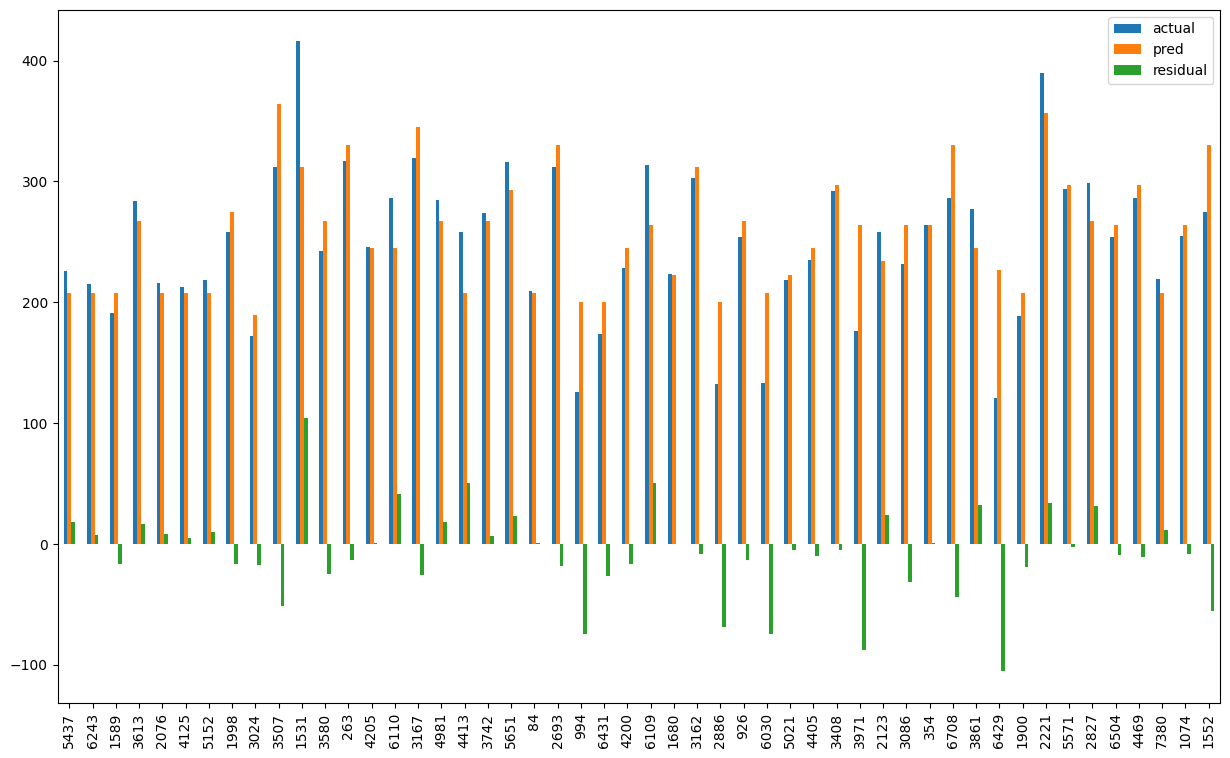

In [ ]:
compare.sample(50).plot(kind="bar", figsize = (15,9))
plt.show()

In [ ]:
eval_metric (y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.7316700768477529
MAE 		: 23.64558217123031
MSE 		: 968.3280260571065
RMSE 		: 31.117969504084076


In [ ]:
lr = train_val(y_train,y_pred_train, y_test, y_pred, "linear")
lr

,linear_train,linear_test
R2,0.730376,0.731670
mae,23.163052,23.645582
mse,941.173085,968.328026
rmse,30.678544,31.117970


Plotting Residuals

In [ ]:
from yellowbrick.regressor import ResidualsPlot

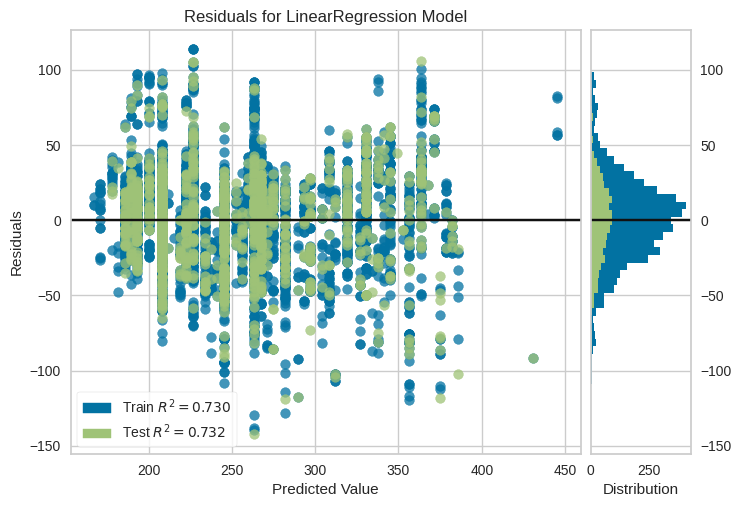

In [ ]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

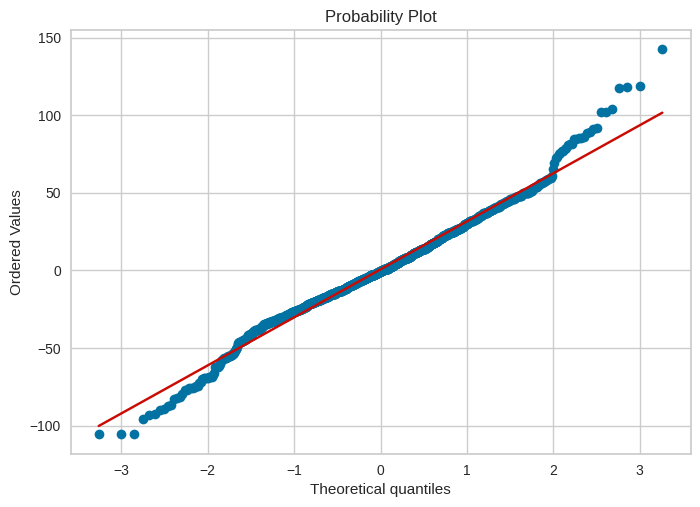

In [ ]:
residuals = y_test - y_pred
stats.probplot(residuals, dist = "norm", plot=plt);

In [ ]:
# The above plot indicates that the residuals follow a normal distribution.

In [ ]:
from yellowbrick.regressor import PredictionError

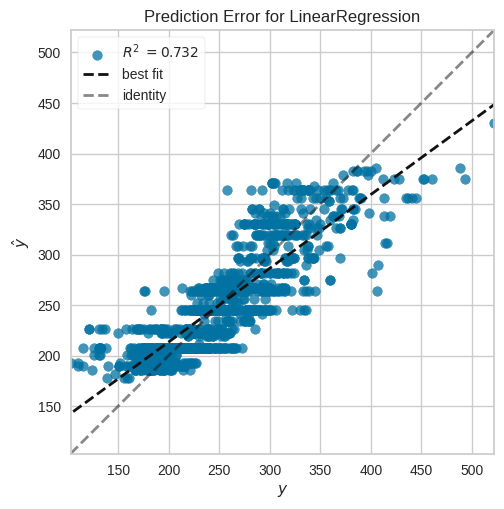

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.84946717],
       [ 0.91379859],
       [ 1.35461502],
       ...,
       [-0.84946717],
       [-0.84946717],
       [-0.48212013]])

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.1147731 ],
       [-0.1147731 ],
       [ 0.32604334],
       ...,
       [ 1.20767621],
       [-0.99640598],
       [-0.84946717]])

##Checking mean = 0 and StdDev =1






In [ ]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0
mean,-0.0
std,1.0


In [ ]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0
mean,0.0
std,1.0


##Linear Regression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_scaled = lm.predict(X_test_scaled)

In [ ]:
y_train_scaled_pred = lm.predict(X_train_scaled)

In [ ]:

def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


In [ ]:
ls = train_val(y_train,y_train_scaled_pred, y_test, y_pred_scaled, "linearscaled")
ls

,linearscaled_train,linearscaled_test
R2,0.730376,0.731670
mae,23.163052,23.645582
mse,941.173085,968.328026
rmse,30.678544,31.117970


In [ ]:
pd.concat([lr, ls], axis = 1)

,linear_train,linear_test,linearscaled_train,linearscaled_test
R2,0.730376,0.731670,0.730376,0.731670
mae,23.163052,23.645582,23.163052,23.645582
mse,941.173085,968.328026,941.173085,968.328026
rmse,30.678544,31.117970,30.678544,31.117970
